# STEM - EDA
                                                                                                    
                                                                                                    
                                                          

**STEM**  - Science, technology, engineering, and mathematics is a broad term used to group together these academic disciplines. This term is typically used to address an education policy or curriculum choices in schools. It has implications for workforce development, national security concerns and immigration policy.

This dataset contains data about STEM jobs - salaries, location, their education, workers gender and timestamp column.

Basic dataframe info:
* number of rows: 62642
* number of columns: 29

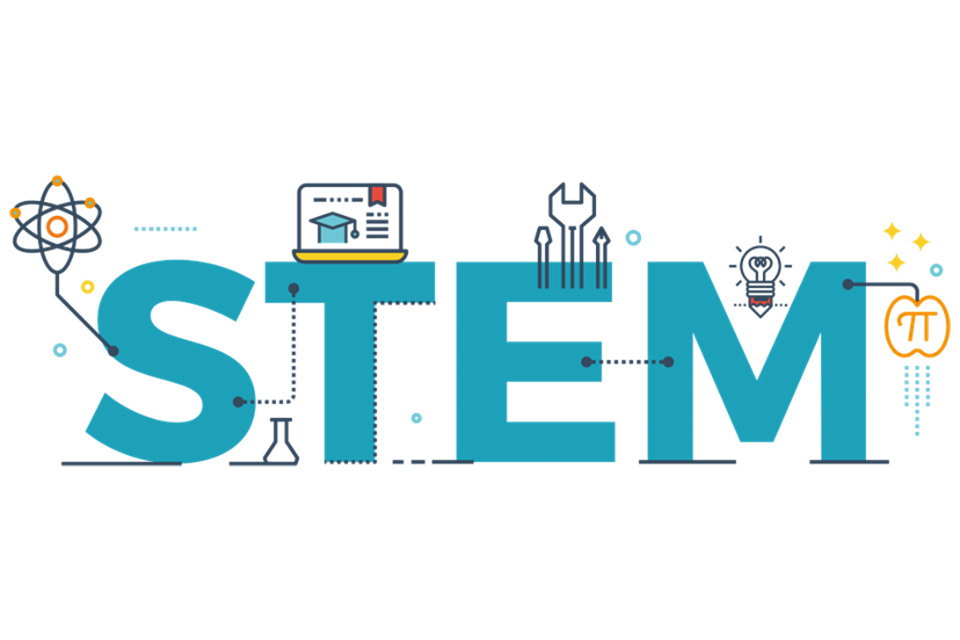

## 1. Data preprocessing

### 1.1 Loading modules

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")


import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

df = pd.read_csv('Levels_Fyi_Salary_Data.csv')

### 1.2 Data inspection

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

At first glance:

* timestamp should be in datatime format, 
* company, title, location, gender seems to be really important columns.
* in first five rows there's two values where we can find basesalary equal 0

Let's see null values balance:

In [ ]:
df.isnull().sum()

There's a lot of null values (almost third part of whole data) in gender column - it's not good. I was quite interested in this one. Other features seems to be not so important.

In [ ]:
df[df['basesalary'] == 0]

It's 2 and half thousands jobs offers which have basesalary equal to 0, I'm going to replace 0 values with mean of all basesalaries.

In [ ]:
df['basesalary'].replace(0, np.mean(df['basesalary']), inplace=True)

Let's see how amount of job offers was chaning in time:

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

fig = go.Figure()

date_value_counts = df['timestamp'].value_counts()

fig.add_trace(
    go.Histogram(x=date_value_counts.index, y=date_value_counts.values,
                          marker_color='cadetblue')

)

fig.update_layout(
                        title=dict(text='STEM jobs in time',
                        font=dict(family='Times New Roman', 
                                  size=24), 
                        x=.5)
)

fig

There's one outliner between Jun 9 - Jun 23 2019, anyway distribution seems to be left skewed. It means that job offers in STEAM grows over the years.

## 2.Data visualizations

### 2.1 Gender

* basesalary

In [ ]:
df['gender'].unique()

Well Nan value is usuall but I 've never heard about Senior software Engineer gender.

In [ ]:
df['gender'].replace('Title: Senior Software Engineer', np.nan, inplace=True)
df['gender'].replace(np.nan, 'Unknown', inplace=True)

In [ ]:
df['basesalary'].sort_values(ascending=False)

I'm going to leave only basesalaries less than 1 milion

In [ ]:
df = df[df['basesalary'] < 1000000]

In [ ]:
fig = go.Figure()

colors = ['lime', 'grey', 'indygo', 'gold']

fig = fig.add_trace(
                        go.Pie(labels=df['gender'].
                           value_counts().index, 
                           values=df['gender'].
                           value_counts().values,
                        hoverinfo='label+percent',
                        textinfo='percent',
                        textfont=dict(size=14, color='black'),
                        marker=dict(colors=colors,
                                    line=dict(width=2)),
                        hole=0.7)
                   )

fig.update_layout(
    font=dict(family='Lato', size=16, color='black'),
    title=dict(text='<b>GENDER IN STEM JOBS<b>', 
               font=dict(size=24),x=0.5),
    plot_bgcolor='white'
)

In [ ]:
fig = px.ecdf(df,x='basesalary', color='gender' )

In [ ]:
g = sns.FacetGrid(df, col='gender', aspect = .5, sharex=False, height=7, 
                  sharey=False, xlim = (0, 5e5))
g = g.map(sns.kdeplot, 'basesalary', shade=True, lw=5)
g.set_xticklabels(rotation=45)
g.set_titles(col_template='{col_name}', size=13)

In [ ]:
df['count'] = 1
grouped_by_gender =(        
    df.groupby(['company','gender'])
    .count()
    .sort_values(by='count', 
                 ascending=False)
    .head(20)
    .reset_index()
)

grouped_by_gender[['company', 'gender', 'count']]

Following conclusions can be drawn from the plots above:

* Males have more than 50 % of all jobs in STEM
* There's no visible difference between salaries among the genders in salary between 100k and 200k dollars but it looks like jobs with salary 750k and more are mostly occupied by men
* There's more jobs that mens occupy for instance in Amazon or Microsoft.

The biggest problem is incomplete data (Unknown) which don't give us full point of view.

### 2.2 Companies, titles, locations

In [ ]:
def top_5_barchart(column_name, data_frame=df, orientation='h'):
    """arguments: column_name:str - name of the column
       data_frame:pandas data frame - default df
       orientation:str default: horizontal
                                v - vertical                           
        returns:  bar plot object
    """
    
    #  If column_name is not str:
    if type(column_name) != str:
        raise ValueError(f'Expected type str, got: {type(column_name)}')
    
    
    #  If columm_name is not in data frame
    if column_name not in data_frame.columns:
        raise ValueError(f'{column_name} is not in DataFrame!')


    top_5 = (
            data_frame[column_name]
            .value_counts()
            .head()
            )
    
    x_axis = top_5.index
    y_axis = top_5.values
    
    # when orientation is not correct
    if orientation not in ['h', 'v']:
        raise ValueError("""Choose correct orientation: 
                            h - horizontal,
                            v - vertical""")
    
    # in case when orientaion is vertical
    if orientation == 'v':
        x_axis, y_axis = y_axis, x_axis
    
    
    fig = px.bar(data_frame, x=x_axis, y=y_axis,
                color_discrete_sequence=['maroon'])
    
    #  setting x axis title when orientation is vertical
    if orientation == 'v':   
        fig.update_layout(xaxis=dict(title='frequency'),
                         yaxis=dict(title=f'{column_name}'))
    
    
    # setting y axes at title when orientation is horizontal
    else:
        fig.update_layout(yaxis=dict(title='frequency'),
                         xaxis=dict(title=f'{column_name}'))
    
    fig.update_layout(font=dict(family='Lato', size=16),
                     title=dict(text=f'<b>{column_name.capitalize()}<b>', 
                                font=dict(size=24),x=0.5),
                     plot_bgcolor='white')
    fig.show()

In [ ]:
column_names = ['company', 'title', 'location']

for column in column_names:
    top_5_barchart(column)

* The biggest amount of STEM jobs is in Amazon
* The most common title is Software Engineer
* The most common location is Seattle, Washington

## 3.Conclusions

STEM sector gets bigger and bigger, more specialists with higher education are useful in many interesting disciplines. From the data above conclusion is clear for me - gender don't have impact on average salary in STEM. But from the other side - there's more mans than womans working in this sector.

USA seems to be the best location for this kind of jobs.